In [91]:
import pandas as pd
import numpy as np

In [92]:
# Вывод данных из csv во всю ширину окна
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [73]:
# /n - перенос строки
# /t - табуляция
# /n - вертикальная табуляция

string = 'Name1 Surname1, Name2 Surname2, ...'

print('Печатает в одну строку:',string) #
print('Разделить по пробелам:', string.split()) #
print('Разделить по запятой и пробелу:',string.split(', '))

Печатает в одну строку: Name1 Surname1, Name2 Surname2, ...
Разделить по пробелам: ['Name1', 'Surname1,', 'Name2', 'Surname2,', '...']
Разделить по запятой и пробелу: ['Name1 Surname1', 'Name2 Surname2', '...']


2) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием)
Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)
Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id

In [74]:
# Создаём таблицу ДатаФрейм (словарь)
df = pd.DataFrame({
    'Клиент id': [1,10,12,43,100],
    'Пол': [1,1,1,0,0],
    'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
    'Возраст': ['63', '24', '12', '54', '37']
})
print('Создаём таблицу ДатаФрейм\n', df)
print()

# Создадим словарь переименований
correspondance = {'Клиент id': 'Client_id',
    'Пол': 'sex',
    'Благосостояние': 'wealth',
    'Возраст': 'age'
}
df.rename (columns=correspondance, inplace=True) # inplace=True - перезапись новых данных в старую ячейку
print('Переименуем таблицу на английском\n', df)

Создаём таблицу ДатаФрейм
    Клиент id  Пол Благосостояние Возраст
0          1    1         medium      63
1         10    1           high      24
2         12    1           high      12
3         43    0            low      54
4        100    0         medium      37

Переименуем таблицу на английском
    Client_id  sex  wealth age
0          1    1  medium  63
1         10    1    high  24
2         12    1    high  12
3         43    0     low  54
4        100    0  medium  37


3) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

In [75]:
medium_35 = df.query('wealth == "medium" and age > "35"')
print('возраст больше 35:\n', medium_35)

возраст больше 35:
    Client_id  sex  wealth age
0          1    1  medium  63
4        100    0  medium  37


4) Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [76]:
df['older_than_30'] = df.age > '30'
print('Новая колонка older_than_30 - больше ли возраст 30 лет?:\n',df)

Новая колонка older_than_30 - больше ли возраст 30 лет?:
    Client_id  sex  wealth age  older_than_30
0          1    1  medium  63           True
1         10    1    high  24          False
2         12    1    high  12          False
3         43    0     low  54           True
4        100    0  medium  37           True


5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [77]:
unique_num = df.nunique()
print('Создадим переменную "unique_num" c числом уникальных значений для каждой колонки:\n', unique_num)

Создадим переменную "unique_num" c числом уникальных значений для каждой колонки:
 Client_id        5
sex              2
wealth           3
age              5
older_than_30    2
dtype: int64


6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

In [78]:
data = pd.DataFrame({
    'Client_id': [1,5,10,8619],
    'amount': [42331,88420,1714,80572],
    'date': [1354677, 12864, 124580, 135479]
})
print('Создадим новый ДатаФрейм:\n',data)
print()

# how - тип объединения. объединяем их по колонке client_id
full_data = df.merge(data, how  = 'inner', on ='Client_id')
print('Объединим их по колонке client_id:\n',full_data)

Создадим новый ДатаФрейм:
    Client_id  amount     date
0          1   42331  1354677
1          5   88420    12864
2         10    1714   124580
3       8619   80572   135479

Объединим их по колонке client_id:
    Client_id  sex  wealth age  older_than_30  amount     date
0          1    1  medium  63           True   42331  1354677
1         10    1    high  24          False    1714   124580


In [79]:
# how - тип объединения. объединяем их по колонке client_id
full_data = df.merge(data, how  = 'left')
print('Прибавляем к первым данным повторяющиеся вторые:\n',full_data)

Прибавляем к первым данным повторяющиеся вторые:
    Client_id  sex  wealth age  older_than_30   amount       date
0          1    1  medium  63           True  42331.0  1354677.0
1         10    1    high  24          False   1714.0   124580.0
2         12    1    high  12          False      NaN        NaN
3         43    0     low  54           True      NaN        NaN
4        100    0  medium  37           True      NaN        NaN


7) 💀 Сложное задание! 💀
А теперь создадим свою собственную функцию!
Напишите функцию read_n_agg, которая
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят как в task7.png, датасэт в файле companies.csv

In [80]:
df = pd.read_csv('Data/companies.csv', sep=';')
print('Cчитываем файл, в котором разделителем является ";":\n', df.head())

Cчитываем файл, в котором разделителем является ";":
                                 company       income        date
0  ЗАО «Доронин, Колобов и Калашникова»   1221331958  2019-09-09
1                          ООО «Авдеев»  21116804375  1972-12-21
2                РАО «Аксенов Сорокина»  79257158759  2007-03-05
3                Ларионов Инкорпорэйтед  36799366126  2011-08-11
4               Григорьев Инкорпорэйтед  48201837498  1989-09-02


In [81]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';') # считывает переданный файл, в котором разделителем является ;
    res = df.groupby('company', as_index=False) \
        .agg({'income': 'mean'})
    return res
print('Считает средний заработок (income) по каждой компании (company')
print(read_n_agg ('Data/companies.csv'))

Считает средний заработок (income) по каждой компании (company
                                               company        income
0                                                 En +  9.962187e+10
1             АО «Александрова, Савельев и Мельникова»  7.206782e+10
2                                АО «Андреев-Анисимов»  6.931948e+09
3                                АО «Андреев-Макарова»  8.934380e+10
4                              АО «Большаков Кошелева»  7.860861e+10
5                                         АО «Горшков»  9.363675e+10
6                                          АО «Гусева»  8.295779e+10
7                                 АО «Дорофеев-Шубина»  1.189581e+08
8                                 АО «Елисеев-Баранов»  3.626328e+10
9                                   АО «Зайцева Фомин»  2.150642e+10
10                     АО «Кириллов, Шубин и Веселова»  1.975697e+09
11                                        АО «Князева»  1.975841e+09
12                АО «Константинова, Соб

8) Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!
journey_id – уникальный id поездки
user_id – id пользователя
driver_id – id водителя
taxi_id – id машины
icon – тип поездки
start_type – тип заказа (asap, reserved, delayed)
start_at – время начала поездки
start_lat – исходное местоположение пользователя, широта
start_lon – исходное местоположение пользователя, долгота
end_at – время окончания поездки
end_lat – итоговое местоположение, широта
end_lon – итоговое местоположение, долгота
end_state – состояние заказа
driver_start_lat – исходное местоположение водителя, широта
driver_start_lon – исходное местоположение водителя, долгота
arrived_at – время прибытия водителя
source – платформа, с которой сделан заказ
driver_score – оценка водителя клиентом
rider_score – оценка клиента водителем
Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.
Может пригодиться: read_csv()
Датасет для задания: taxi_peru.csv (в папке).



In [93]:
taxi = pd.read_csv('Data/taxi_peru.csv',
                   sep=';',
                   parse_dates=['start_at', 'end_at', 'arrived_at']) # перевод в тип дата
print(taxi.head())

                         journey_id                           user_id                         driver_id                           taxi_id       icon start_type            start_at     start_lat     start_lon              end_at       end_lat       end_lon  end_state driver_start_lat driver_start_lon          arrived_at  source  driver_score  rider_score
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56  executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957 2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off     -12,10825481      -77,0272739 2010-11-16 17:02:00  iPhone           5.0          5.0
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e                               NaN                               NaN  executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133 2010-06-01 00:37:00  -12,12465668  -77,02886963  not found              NaN     

9) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [90]:
# 1й вариант
platform = taxi.source.value_counts() / taxi.shape[0] * 100
print('1й вариант\n', platform)
print()

# 2й вариант
platform = taxi\
    .source\
    .value_counts(normalize=True)\
    .mul(100)\
    .idxmax()
print('2й вариант\n', platform) # iPhone
print()

# 3й вариант
platform = taxi\
    .source\
    .value_counts(normalize=True)\
    .mul(100)\
    .max()\
    .round()
print('3й вариант\n', platform) # 42.0

1й вариант
 iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: source, dtype: float64

2й вариант
 iPhone

3й вариант
 42.0


10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
Полезные функции:
.mul() – умножение, более удобный вариант для использования в цепочке методов
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной

In [85]:
var = np.nan

driver_score_counts = taxi\
    .driver_score\
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index()\
    .rename(columns= {'index': 'driver_score', 'driver_score': 'percentage'})\
    .sort_values('driver_score')
print('сколько раз встречается каждое значение переменной')
print(driver_score_counts)

сколько раз встречается каждое значение переменной
   driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81


11) Теперь строим график! (task11.png) Сначала импортируем библиотеки:
import seaborn as sns
import matplotlib.pyplot as plt
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

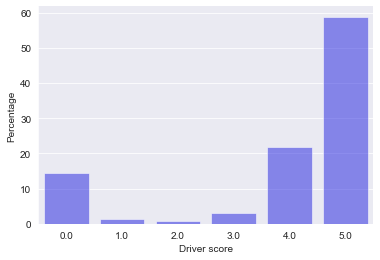

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

12) 💀 Сложное задание! 💀
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

   rider_score  percentage
2          0.0        2.29
4          1.0        0.21
5          2.0        0.19
3          3.0        1.38
1          4.0        8.83
0          5.0       87.10


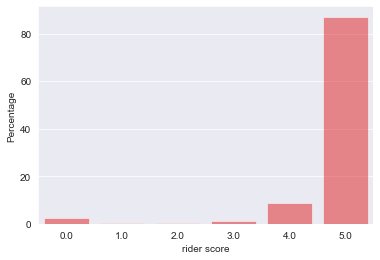

In [97]:
rider_score_counts = taxi\
    .rider_score\
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index()\
    .rename(columns= {'index': 'rider_score', 'rider_score': 'percentage'})\
    .sort_values('rider_score')
print(rider_score_counts)

ax1 = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='red', alpha=0.5)
ax1.set(xlabel='rider score', ylabel='Percentage')
# sns.despine()  # убрать часть рамки графика
plt.show()
